In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
# Concatenate training and test sets for analysis
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

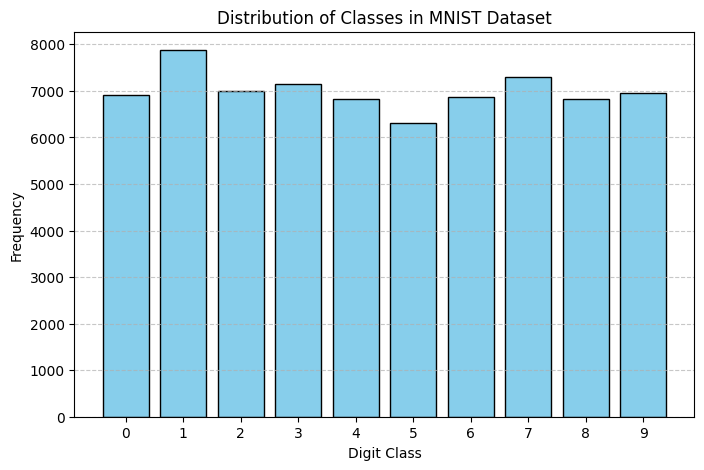

In [24]:
# Plot distribution of classes
plt.figure(figsize=(8, 5))
plt.hist(y_all, bins=np.arange(11)-0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(np.arange(10))
plt.xlabel('Digit Class')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in MNIST Dataset')
plt.savefig('data_distribution.png')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
def add_noise_to_mnist(images, noise_level):
    """
    Add Gaussian noise with specified variance (noise_level) to the MNIST images.
    
    Parameters:
        images (numpy.ndarray): The MNIST images array.
        noise_level (float): The variance of the Gaussian noise to be added.
        
    Returns:
        numpy.ndarray: The MNIST images with added noise.
    """
    # Generate Gaussian noise
    noise = np.random.normal(loc=0, scale=noise_level, size=images.shape)
    
    # Add noise to the images
    noisy_images = images + noise
    
    # Clip pixel values to [0, 255] range
    noisy_images = np.clip(noisy_images, 0, 255)
    
    return noisy_images

# Example usage:
# x_train_noisy = add_noise_to_mnist(x_train, noise_level=50)


In [26]:
# Display dataset properties
print("Total number of images:", len(x_all))
print("Image shape:", x_all[0].shape)
print("Number of unique classes:", len(np.unique(y_all)))

Total number of images: 70000
Image shape: (28, 28)
Number of unique classes: 10


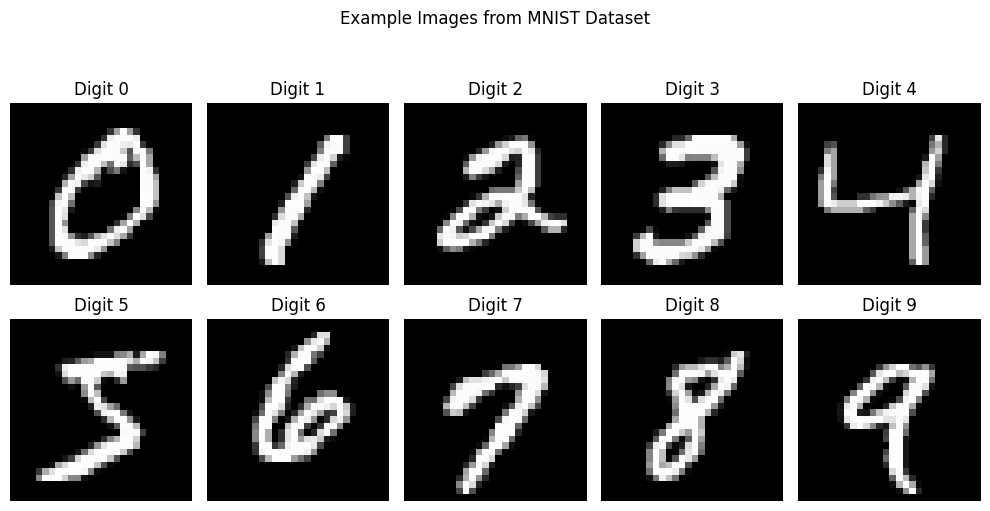

In [27]:
# Display example images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_all[y_all == i][0], cmap='gray')
    plt.title(f'Digit {i}')
    plt.axis('off')
plt.suptitle('Example Images from MNIST Dataset', y=1.05)
plt.savefig('mnist_images.png')
plt.tight_layout()
plt.show()

In [28]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [29]:
print('Train images shape: ',x_train.shape)
print('Train labels shape: ',y_train.shape)
print('Test images shape: ',x_test.shape)
print('Test images shape: ',y_test.shape)

Train images shape:  (60000, 28, 28, 1)
Train labels shape:  (60000,)
Test images shape:  (10000, 28, 28, 1)
Test images shape:  (10000,)


In [30]:
x_train = x_train.astype("float32")/ 255

x_test = x_test.astype("float32")/ 255

In [31]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [32]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [33]:
datagen = ImageDataGenerator(
    rotation_range=10,      # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    shear_range=0.1,        # shear intensity (shear angle in counter-clockwise direction in degrees)
    zoom_range=0.1,         # randomly zoom into images
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)    # randomly flip images

In [34]:
datagen.fit(x_train)

In [35]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 28*28)).reshape(-1, 28, 28, 1)
x_val = scaler.transform(x_val.reshape(-1, 28*28)).reshape(-1, 28, 28, 1)
x_test = scaler.transform(x_test.reshape(-1, 28*28)).reshape(-1, 28, 28, 1)

In [36]:
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Test data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (54000, 28, 28, 1)
Validation data shape: (6000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Training labels shape: (54000, 10)
Validation labels shape: (6000, 10)
Test labels shape: (10000, 10)


In [37]:
cnnmodel = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [38]:
cnnmodel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
cnnmodel.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

test_loss, test_acc = cnnmodel.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
760/760 [==============================] - 20s 26ms/step - loss: 0.1792 - accuracy: 0.9461 - val_loss: 0.0672 - val_accuracy: 0.9770
Epoch 2/5
760/760 [==============================] - 21s 28ms/step - loss: 0.0507 - accuracy: 0.9848 - val_loss: 0.0421 - val_accuracy: 0.9869
Epoch 3/5
760/760 [==============================] - 20s 26ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0390 - val_accuracy: 0.9859
Epoch 4/5
760/760 [==============================] - 20s 26ms/step - loss: 0.0268 - accuracy: 0.9918 - val_loss: 0.0294 - val_accuracy: 0.9907
Epoch 5/5
313/313 [==============================] - 2s 8ms/step - loss: 0.0329 - accuracy: 0.9897
Test accuracy: 0.9897000193595886


In [ ]:
noise_levels = [3, 5, 7, 9, 10, 15, 20]
for noise_level in noise_levels:
    print(f"Training model with noise level: {noise_level}")
    
    # Add noise to the training and validation sets
    x_train_noisy = add_noise_to_mnist(x_train, noise_level)
    x_val_noisy = add_noise_to_mnist(x_val, noise_level)
    
    # Train the model
    cnnmodel.fit(x_train_noisy, y_train, epochs=5, validation_data=(x_val_noisy, y_val))
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = cnnmodel.evaluate(x_test, y_test)
    print(f"Test Loss (Noise Level {noise_level}): {test_loss}")
    print(f"Test Accuracy (Noise Level {noise_level}): {test_accuracy}")

Training model with noise level: 3
Epoch 1/5
1688/1688 [==============================] - 26s 15ms/step - loss: 0.8971 - accuracy: 0.6969 - val_loss: 0.7674 - val_accuracy: 0.7398
Epoch 2/5
1688/1688 [==============================] - 29s 17ms/step - loss: 0.7013 - accuracy: 0.7600 - val_loss: 0.7299 - val_accuracy: 0.7505
Epoch 3/5
1688/1688 [==============================] - 32s 19ms/step - loss: 0.6438 - accuracy: 0.7782 - val_loss: 0.7158 - val_accuracy: 0.7580
Epoch 4/5
1688/1688 [==============================] - 29s 17ms/step - loss: 0.6041 - accuracy: 0.7923 - val_loss: 0.7047 - val_accuracy: 0.7647
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 1.7082 - accuracy: 0.7267
Test Loss (Noise Level 3): 1.7082124948501587
Test Accuracy (Noise Level 3): 0.7267000079154968
Training model with noise level: 5
Epoch 1/5
1688/1688 [==============================] - 31s 18ms/step - loss: 1.3881 - accuracy: 0.5255 - val_loss: 1.3816 - val_accuracy: 0.5292
Epoch 2/5
